### SPRINT2

#### Testar e implementar a extração de dados

Exploraremos mais a fundo o Yahoo Finance a fim de realizar mais testes com os dados e atestar a sua confiabilidade e limitações

In [1]:
#importando a biblioteca do yahoo finance
import yfinance as yf

#importando bibliotecas para uso de datas
from datetime import datetime, timedelta

#importando blibliotecas para exibir gráficos para testes
import plotly.graph_objs as go

#importando biblioteca para medir o tempo de execução
import time

#importando biblioteca para trabalhar com dataframes
import pandas as pd

# Lista de países e intervalos de tempo
countries = ["Brazil", "United States"]
intervals = ["1d", "1wk", "1mo"]  # d - dia wk - semana mo - mês

#criando uma função para formatar a data
def format_date(dt, format="%Y-%m-%d"):
    return dt.strftime(format)

In [4]:
# função que cria um grafo para teste de consulta e tempo de retorno
def plotCandleStick(df, acao="ticket"):
    trace1 = {
        "x": df.index,
        "open": df["Open"],
        "close": df["Close"],
        "high": df["High"],
        "low": df["Low"],
        "type": "candlestick",
        "name": acao,
        "showlegend": False,
    }

    data = [trace1]
    layout = go.Layout()

    return go.Figure(data=data, layout=layout)

Com base na função plotCandleStick apresentada acima e um DataFrame local (df), realizaremos alguns testes:

1. Teste de Integridade dos Dados

Descrição: Verificar se os dados retornados pela API estão completos e corretos.

Implementação:

* Simular a captura de dados históricos de uma ação usando a API do Yahoo Finance.

* Verificar se todas as colunas esperadas (Open, Close, High, Low, etc.) estão presentes no DataFrame.

* Validar se os dados não possuem valores nulos ou incorretos (exemplo: valores negativos ou muito discrepantes).

In [4]:
# Criaremos uma função chamada test_integrity  e usaremos a ação da Apple (AAPL)
# como exemplo para verificar a integridade dos dados obtidos.
def test_integrity(df):
    expected_columns = ["Open", "Close", "High", "Low"]
    for col in expected_columns:
        if col not in df.columns:
            print(f"A coluna {col} não está presente no dataframe!")
        elif df[col].isnull().any():
            print(f"A coluna {col} contém valores nulos!")
        elif (df[col] < 0).any():
            print(f"A coluna {col} possui valores negativos!")
    print("Checagem da integridade dos dados conlcuída.")

# Exemplo de uso:
# Baixando os dados com frequência diária da ação da Apple entre 01/01/2023 e 31/12/2023
df = yf.download("AAPL", start="2023-01-01", end="2023-12-31", interval="1d")
test_integrity(df)

[*********************100%%**********************]  1 of 1 completed

Checagem da integridade dos dados conlcuída.


2. Teste de Confiabilidade da API

Descrição: Testar a confiabilidade da API em termos de tempo de resposta e consistência dos dados.

Implementação:

* Realizar múltiplas requisições para a mesma ação e período e comparar os resultados para verificar consistência.

* Medir o tempo de resposta para avaliar a performance da API.

In [2]:
import time

# Criaremos uma função para testar a confiabilidade dos dados obtidos da API
def test_reliability(stock_symbol, start_date, end_date, interval):
    start_time = time.time()
    
    df1 = yf.download(stock_symbol, start=start_date, end=end_date, interval=interval)
    df2 = yf.download(stock_symbol, start=start_date, end=end_date, interval=interval)

    end_time = time.time()
    
    if df1.equals(df2):
        print("Os dados são consistentes através de múltiplas requisições.")
    else:
        print("Inconsistências foram encontradas nos dados para múltiplas requisições!")
    
    print(f"Tempo levado para a requisição: {end_time - start_time:.2f} seconds")

# Exemplo de uso:
# Usando a ação da Apple (AAPL) entre os dias 1 de janeiro de 2023 e
# 31 de dezembro de 2023, com intervalo diário (1d)
test_reliability("AAPL", "2023-01-01", "2023-12-31", "1d")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Os dados são consistentes através de múltiplas requisições.
Tempo levado para a requisição: 12.36 seconds


Utilizaremos a função abaixo para realizar 1000 conexões simultâneas a uma mesma ação

In [3]:
# Criaremos uma função para testar a consistência dos dados obtidos da API
def test_reliability(stock_symbol, start_date, end_date, interval, num_requests=1000):
    dfs = []
    start_time = time.time()
    
    for i in range(num_requests):
        print(f"Requisição {i + 1}/{num_requests}")
        df = yf.download(stock_symbol, start=start_date, end=end_date, interval=interval, progress=False)
        dfs.append(df)

    end_time = time.time()

    # Verificando a consistência entre todos os DataFrames
    consistent = True
    for i in range(1, num_requests):
        if not dfs[0].equals(dfs[i]):
            print(f"Inconsistências encontradas entre df1 e df{i+1}!")
            consistent = False

    if consistent:
        print("Os dados são consistentes através de múltiplas requisições.")
    else:
        print("Inconsistências foram encontradas nos dados para múltiplas requisições!")
    
    print(f"Tempo total para {num_requests} requisições: {end_time - start_time:.2f} segundos")

# Exemplo de uso:
# Usando a ação da Apple (AAPL) entre os dias 1 de janeiro de 2023 e 31 de dezembro de 2023, com intervalo diário (1d)
test_reliability("AAPL", "2023-01-01", "2023-12-31", "1d")


Requisição 1/1000
Requisição 2/1000
Requisição 3/1000
Requisição 4/1000
Requisição 5/1000
Requisição 6/1000
Requisição 7/1000
Requisição 8/1000
Requisição 9/1000
Requisição 10/1000
Requisição 11/1000
Requisição 12/1000
Requisição 13/1000
Requisição 14/1000
Requisição 15/1000
Requisição 16/1000
Requisição 17/1000
Requisição 18/1000
Requisição 19/1000
Requisição 20/1000
Requisição 21/1000
Requisição 22/1000
Requisição 23/1000
Requisição 24/1000
Requisição 25/1000
Requisição 26/1000
Requisição 27/1000
Requisição 28/1000
Requisição 29/1000
Requisição 30/1000
Requisição 31/1000
Requisição 32/1000
Requisição 33/1000
Requisição 34/1000
Requisição 35/1000
Requisição 36/1000
Requisição 37/1000
Requisição 38/1000
Requisição 39/1000
Requisição 40/1000
Requisição 41/1000
Requisição 42/1000
Requisição 43/1000
Requisição 44/1000
Requisição 45/1000
Requisição 46/1000
Requisição 47/1000
Requisição 48/1000
Requisição 49/1000
Requisição 50/1000
Requisição 51/1000
Requisição 52/1000
Requisição 53/1000
Re

3. Teste de Limitações da API

Descrição: Verificar as limitações da API em termos de períodos de tempo suportados e granularidade dos dados.

Implementação:

Tentar capturar dados com intervalos de tempo pequenos (como 1m - 1 minuto) ou longos períodos históricos para ver se a API retorna os dados corretamente ou se há alguma limitação.

In [2]:
def test_api_limits(stock_symbol):  
    try:
        # Teste com um intervalo muito pequeno (1 minuto)
        df_min = yf.download(stock_symbol, period="1d", interval="1m")
        print("Teste 1 - Dados recuperados com sucesso com um intervalo pequeno.")
        print(df_min.head(1))
        print(df_min.tail(1))
    except Exception as e:
        print(f"Erro no Teste 1 usando um intervalo pequeno: {e}")

    try:
        # Teste com um longo período histórico
        df_long = yf.download(stock_symbol, start="2000-01-01", end="2023-12-31", interval="1mo")
        print("Teste 2 - com longo período histórico concluído com sucesso.")
        print(df_long.head(1))
        print(df_long.tail(1))
    except Exception as e:
        print(f"Error no Teste 2 - usando um período longo: {e}")

# Exemplo de uso:
test_api_limits("AAPL")


[*********************100%%**********************]  1 of 1 completed


Teste 1 - Dados recuperados com sucesso com um intervalo pequeno.
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-08-07 09:30:00-04:00  206.889999  208.350006  206.410004  208.274994   

                            Adj Close   Volume  
Datetime                                        
2024-08-07 09:30:00-04:00  208.274994  4642127  
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-08-07 15:59:00-04:00  209.649994  209.970001  209.600006  209.860001   

                            Adj Close   Volume  
Datetime                                        
2024-08-07 15:59:00-04:00  209.860001  1090502  


[*********************100%%**********************]  1 of 1 completed

Teste 2 - com longo período histórico concluído com sucesso.
                Open      High       Low     Close  Adj Close       Volume
Date                                                                      
2000-01-01  0.936384  1.084821  0.772321  0.926339   0.783176  12555177600
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-12-01  190.330002  199.619995  187.449997  192.529999  192.024185   

                Volume  
Date                    
2023-12-01  1062774800  


4. Teste de exibição da API

Descrição: Verificar se a recuperação de dados histórios da Apple podem ser exibidos graficamente.

Implementação:

Capturar dados históricos para ver se são exibidos corretamente, para utilizaremos
como referência o segundo semestre de 2023

In [5]:
# Definindo as datas de início e fim
start_date = "2023-07-01"
end_date = "2023-12-31"

# Baixando os dados históricos da Apple (AAPL) usando yfinance
df = yf.download("AAPL", start=start_date, end=end_date, interval="1d")

# Plotando o gráfico candlestick
fig = plotCandleStick(df, acao="AAPL")

# Exibindo o gráfico no Jupyter Notebook
fig.show()

[*********************100%%**********************]  1 of 1 completed


#### LIMPEZA E TRATAMENTO DE DADOS

1. Verificação de valores ausentes:

Eventualmente, os dados podem ter lacunas, especialmente se houver interrupções no mercado ou em dias de feriado, portanto começaremos por verificar se os dados possuem valores ausentes (NaN) no DataFrame testado e decidamos como lidar com eles.

In [17]:
# Definindo as datas de início e fim
start_date = "2023-07-01"
end_date = "2023-12-31"

# Baixando os dados históricos da Apple (AAPL) usando yfinance
df = yf.download("AAPL", start=start_date, end=end_date, interval="1d")

df.head(3)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-03,193.779999,193.880005,191.759995,192.460007,191.443314,31458200
2023-07-05,191.570007,192.979996,190.619995,191.330002,190.319275,46920300
2023-07-06,189.839996,192.020004,189.199997,191.809998,190.796722,45094300


In [7]:
# Verificar valores ausentes
missing_values = df.isnull().sum()
print(missing_values)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [8]:
# Remover linhas com valores ausentes
df_cleaned = df.dropna()

In [9]:
# Ou, preencher valores ausentes com o valor anterior
df_cleaned = df.fillna(method='ffill')


C:\Users\vasco\AppData\Local\Temp\ipykernel_13336\3227514366.py:2: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



2. Verificação de outliers:

Outliers podem distorcer análises e visualizações, especialmente em alguns tipos de gráficos, para isso identificaremos possíveis outliers usaremos uma técnica estatística chamada IQR (Interquartile Range) para garantir que eles não afetem negativamente a análise.

O IQR é uma medida estatística que representa a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1) de um conjunto de dados.

O que são quartis?

Primeiro Quartil (Q1): É o valor abaixo do qual se encontra 25% dos dados.
Terceiro Quartil (Q3): É o valor abaixo do qual se encontra 75% dos dados.

Como é calculado?
O IQR é calculado pela fórmula:

IQR = 𝑄3 − 𝑄1

Para que serve o IQR?

O IQR é usado principalmente para identificar a dispersão central dos dados e para detectar outliers (valores atípicos). Dados que caem abaixo de 𝑄1 − 1.5 × 𝐼𝑄𝑅 ou acima de 𝑄3 + 1.5 × 𝐼𝑄𝑅 são frequentemente considerados outliers.

In [10]:
# Usando o IQR para detectar outliers no preço de fechamento
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Close'] < (Q1 - 1.5 * IQR)) | (df['Close'] > (Q3 + 1.5 * IQR))]
print(outliers)

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


In [7]:
# Remover outliers (opcional, dependendo da análise)
df_cleaned = df[~df.index.isin(outliers.index)]

3. Verificação de duplicatas:

Embora improvável, duplicatas podem ocorrer devido a erros na API ou em requisições repetidas e para evitar isso removeremos quaisquer ocorrência existente para evitar distorções na análise.

In [11]:
# Remover duplicatas caso existam
df_cleaned = df.drop_duplicates()

4. Normalização de datas:

Certificaremos que o intervalo de datas usado esteja alinhado corretamente com os dias de mercado abertos, removendo datas fora do período de trading.

In [15]:
# Verificar se as datas são dias úteis
df_cleaned = df[df.index.to_series().apply(lambda x: x.isoweekday() < 6)]
df_cleaned.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-03,193.779999,193.880005,191.759995,192.460007,191.443314,31458200
2023-07-05,191.570007,192.979996,190.619995,191.330002,190.319275,46920300
2023-07-06,189.839996,192.020004,189.199997,191.809998,190.796722,45094300
2023-07-07,191.410004,192.669998,190.240005,190.679993,189.672684,46778000
2023-07-10,189.259995,189.990005,187.039993,188.610001,187.613632,59922200


5. Reindexação e interpolação:

Podem haver lacunas nas datas, por exemplo, faltando dados em alguns dias úteis e poderemos interpolar ou ajustar os dados, para isto reindexaremos o dataframe para garantir que todas as datas dentro do intervalo estejam presentes e, em seguida, interpolar os dados ausentes, se necessário.

In [14]:
# Reindexando para incluir todas as datas do intervalo
all_dates = pd.date_range(start=start_date, end=end_date, freq='B')  # 'B' significa dias úteis
df_reindexed = df.reindex(all_dates)

# Interpolando valores ausentes
df_cleaned = df_reindexed.interpolate(method='linear')

df_cleaned.head(5)

,Open,High,Low,Close,Adj Close,Volume
2023-07-03,193.779999,193.880005,191.759995,192.460007,191.443314,31458200.0
2023-07-04,192.675003,193.430000,191.189995,191.895004,190.881294,39189250.0
2023-07-05,191.570007,192.979996,190.619995,191.330002,190.319275,46920300.0
2023-07-06,189.839996,192.020004,189.199997,191.809998,190.796722,45094300.0
2023-07-07,191.410004,192.669998,190.240005,190.679993,189.672684,46778000.0


6. Validação final:

Para garantir que, após todas as limpezas e tratamentos, os dados estão consistentes e prontos para análise, faremos uma validação final visualizando um resumo estatístico dos dados e criaremos um gráfico simples para inspecionar a integridade dos dados.

In [18]:
# Resumo estatístico
print(df_cleaned.describe())

             Open        High         Low       Close   Adj Close  \
count  126.000000  126.000000  126.000000  126.000000  126.000000   
mean   183.953016  185.393730  182.545635  184.012382  183.298774   
std      8.698107    8.420353    8.755001    8.535430    8.527725   
min    166.910004  168.960007  165.669998  166.889999  166.232559   
25%    176.487495  178.045006  175.130001  176.590004  175.894337   
50%    183.465004  185.464996  181.699997  182.900002  182.179474   
75%    191.570007  193.362503  190.795002  191.907501  190.941780   
max    198.020004  199.619995  197.000000  198.110001  197.589523   

             Volume  
count  1.260000e+02  
mean   5.548550e+07  
std    1.638125e+07  
min    2.404830e+07  
25%    4.569262e+07  
50%    5.237990e+07  
75%    6.080905e+07  
max    1.282567e+08  


<Axes: title={'center': 'Preço de Fechamento - AAPL'}, xlabel='Date'>

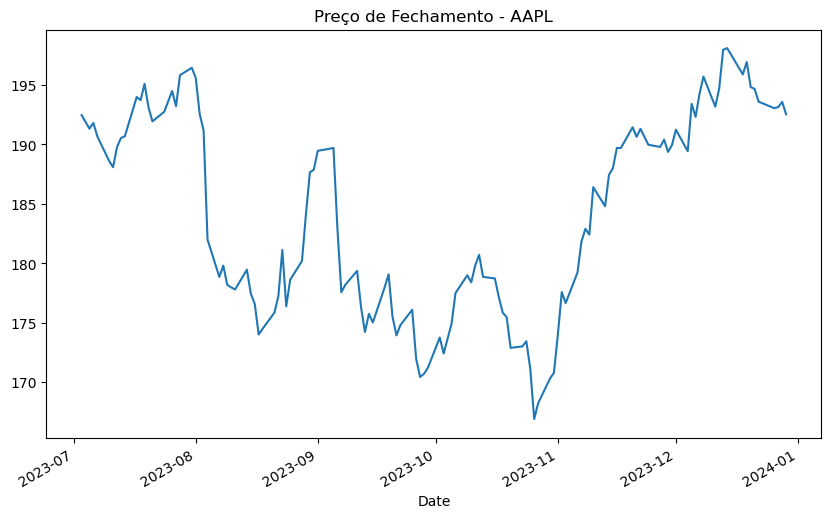

In [19]:
# Visualização simples para verificação
df_cleaned['Close'].plot(title="Preço de Fechamento - AAPL", figsize=(10,6))


Considerações finais:

Embora os dados do Yahoo Finance sejam geralmente confiáveis, essas etapas de limpeza e tratamento garantem que estejamos trabalhando com um conjunto de dados robusto, minimizando possíveis erros ou distorções na análise final.